# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/Users/daniilpetrovskiy/Desktop/yandex_practicum_project/2. Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости/real_estate_data (1).csv', sep = '\t')

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

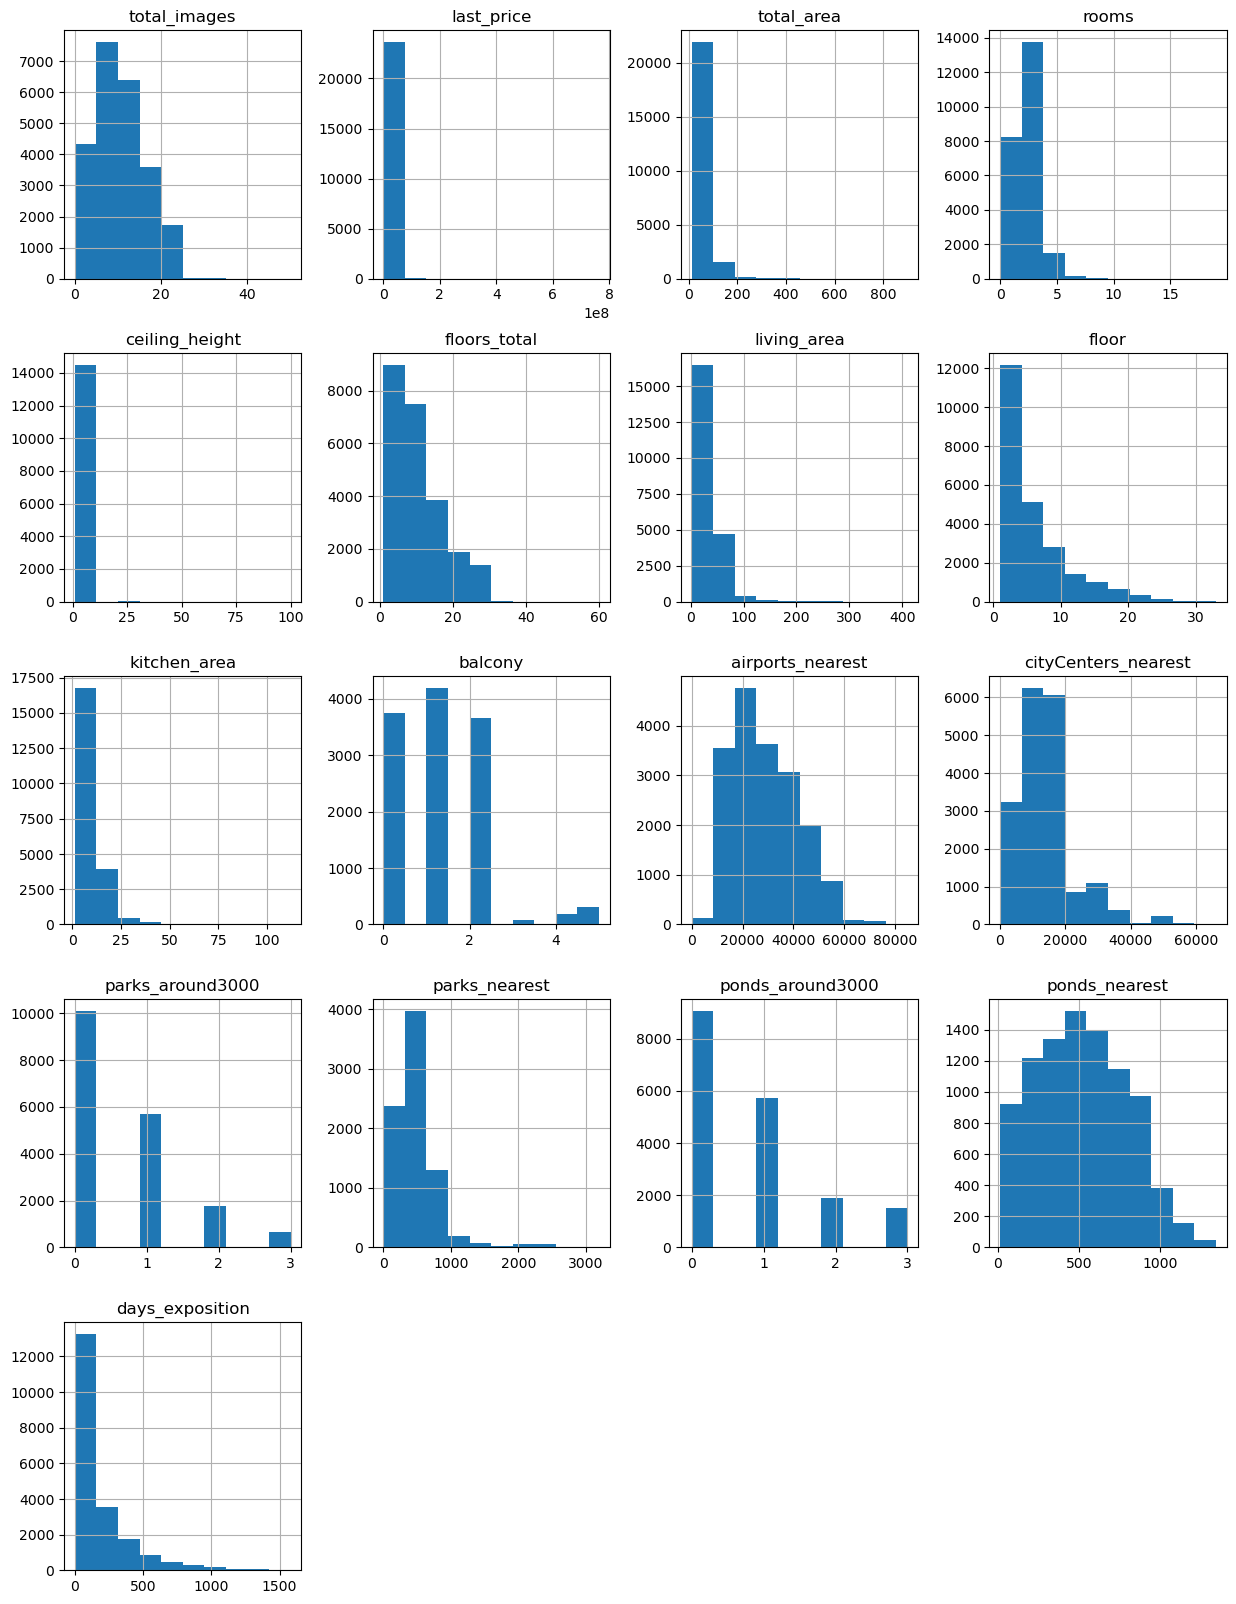

In [ ]:
data.hist(figsize=(15, 20))

In [ ]:
data.duplicated().sum()

0

### Предобработка данных

В столбце "balcony" в некоторых строках не указано число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Кроме того, преобразуем столбец к целочисленному типу данных (int).

In [ ]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
display(data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Также в столбце "floors_total" из 23 699 строк заполнено 23 613, не заполнено – 86. Максимальный этаж – 60, кол-во квартир с этажностью более 30 этажей – 32. Удалим 86 строк, в которых не заполнено количество этажей.

In [ ]:
data = data.dropna(subset=['floors_total'])

В столбце "ceiling_height" из 23 699 строк заполнено 14 504. Кол-во квартир с высотой потолка более 25 м. – 32, это возможные ошибки и ими можно пренебречь из-за незначительности. Также в данных присутствует строка “ nan”, которую надо удалить.

Пропуски в столбце "ceiling_height" заменим на медианы значений высот потолков по каждому этажу. Для этого напишем цикл перебирающий уникальные значения столбца 'floors_total' и в случае пропуска в столбце 'ceiling_height', заменит на медианное значение высоты потолков по каждому этажу

In [ ]:
# display(data['ceiling_height'].unique())
# print(data['ceiling_height'][data['ceiling_height'] > 10].count())

median_replace = data.groupby('floors_total')['ceiling_height'].median()
for total in data['floors_total'].unique():
    data.loc[(data['floors_total'] == total) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_replace[total]

# Далее исключим строки с высотой потолков более 10 м, как вероятные ошибки данных
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height'])
print(data['ceiling_height'][data['ceiling_height'] > 10].count())
# data.info()
# display(data['ceiling_height'].unique())

0


Также пропуски в столбце "kitchen_area" заменим на медианы значений площади кухни по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'kitchen_area', заменит на медианное значение площади кухни по данному количеству комнат.

In [ ]:
median_replace_kitchen = data.groupby('rooms')['kitchen_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_replace_kitchen[total]
# display(data['kitchen_area'].value_counts())

# Исключим 193 строки с записью "  nan", как вероятные ошибки данных.
data.loc[data['kitchen_area'] == '  nan','kitchen_area'] = None
data = data.dropna(subset=['kitchen_area'])
# display(data['kitchen_area'].unique())

Пропуски в столбце "living_area" заменим на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'living_area', заменит на медианное значение жилой площади по данному количеству комнат

In [ ]:
median_replace_rooms = data.groupby('rooms')['living_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['living_area'].isna()), 'living_area'] = median_replace_rooms[total]

Преобразуем столбец 'floors_total' к целочисленному типу данных (int).

In [ ]:
# преобразуем столбец к целочисленному типу данных (int).
data['floors_total'] = data['floors_total'].astype(int)
#  display(data['floors_total'].value_counts())

В столбце "is_apartment" в некоторых строках есть пропуски, заменим такие пропуски на False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# display(data['is_apartment'].value_counts())

Исключим пропуски в столбце "locality_name", как вероятные ошибки данных

In [ ]:
# исключим пропуски в столбце "locality_name"
data = data.dropna(subset=['locality_name'])

In [ ]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 361


In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print('Заменяем все "ё" на "е"')
loc_length()
print()

Заменяем все "ё" на "е"
Количество уникальных занчений locality_name: 327



In [ ]:
print(data['ceiling_height'].min())
data['ceiling_height'].max()

1.0


8.3

In [ ]:
print(data.describe().min())
data.describe().max()


total_images               0.000000
last_price             12190.000000
total_area                12.000000
rooms                      1.000000
ceiling_height             0.245636
floors_total               1.000000
living_area                2.000000
floor                      1.000000
kitchen_area               1.300000
balcony                    0.000000
airports_nearest           0.000000
cityCenters_nearest      181.000000
parks_around3000           0.000000
parks_nearest              1.000000
ponds_around3000           0.000000
ponds_nearest             13.000000
days_exposition            1.000000
dtype: float64


total_images               23345.0
last_price             763000000.0
total_area                 23345.0
rooms                      23345.0
ceiling_height             23345.0
floors_total               23345.0
living_area                23345.0
floor                      23345.0
kitchen_area               23345.0
balcony                    23345.0
airports_nearest           84869.0
cityCenters_nearest        65968.0
parks_around3000           17930.0
parks_nearest               7994.0
ponds_around3000           17930.0
ponds_nearest               8958.0
days_exposition            20194.0
dtype: float64

**Вывод**

В первоначальном файле было 23 699 строк, в результате обработки и удаления вероятных ошибок данных осталось в датасете 23 345 строк, по которым заполнены все строки во всех значимых столбцах. В процессе обработки данных произведено следующее:

В столбце "balcony" пропуски были заменены на 0, также столбец преобразован к целочисленному типу данных.
Пропуски в столбце "ceiling_height" заменили на медианы значений высот потолков по каждому этажу.
Пропуски в столбце "kitchen_area" заменили на медианы значений площади кухни по каждому значению кол-ва комнат столбца "rooms".
Пропуски в столбце "living_area" заменили на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms".
В столбце "is_apartment" пропуски заменили на False.
Исключили пропуски в столбце "locality_name", как вероятные ошибки.
Значения в остальных столбцах предлагаю не обрабатывать как менее значимые для проведения данного исследования.

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим в столбец "price_area" цену квадратного метра

In [ ]:
data['price_area'] = data['last_price'] / data['total_area']

Добавим в таблицу день недели, месяц и год публикации объявления

In [ ]:
# столбец "first_day_exposition" приведем к удобному виду, оставим только год, месяц, день
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['day_weekday'] = data['first_day_exposition'].dt.weekday
data['day_month'] = data['first_day_exposition'].dt.month
data['day_year'] = data['first_day_exposition'].dt.year
# data.head()

Добавим в таблицу варианты этажа квартиры (первый, последний, другой)

In [ ]:
data['floor_group'] = 'другой'
data['floor_group'] = data['floor_group'].where(data['floor'] > 1, 'первый')
data['floor_group'] = data['floor_group'].where(data['floor'] < data['floors_total'], 'последний')
# data.head()

Также добавим в таблицу столбец "center_distance" расстояние до центра города в километрах

In [ ]:
data['center_distance'] = round(data['cityCenters_nearest'] / 1000)
# data.head()

### Проведите исследовательский анализ данных

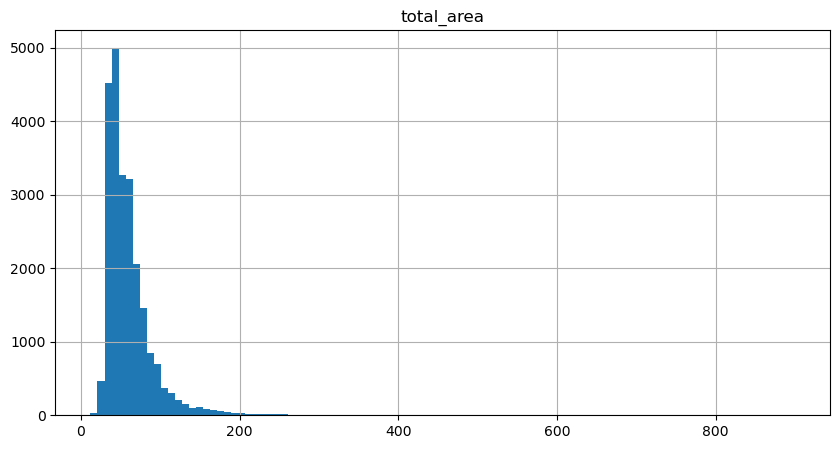

count    23345.000000
mean        60.585056
std         35.626497
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


In [ ]:
# Гистограмма для столбца площади квартиры
data.hist('total_area', bins=100, figsize = (10,5))
plt.show()
print(data['total_area'].describe())

Из гистограммы видно, что большим спросом пользуются квартиры до 100 м2, среднее значение площади составляет - 60,5 м2. Квартиры с площадью более 150 м2 являются редкостью.

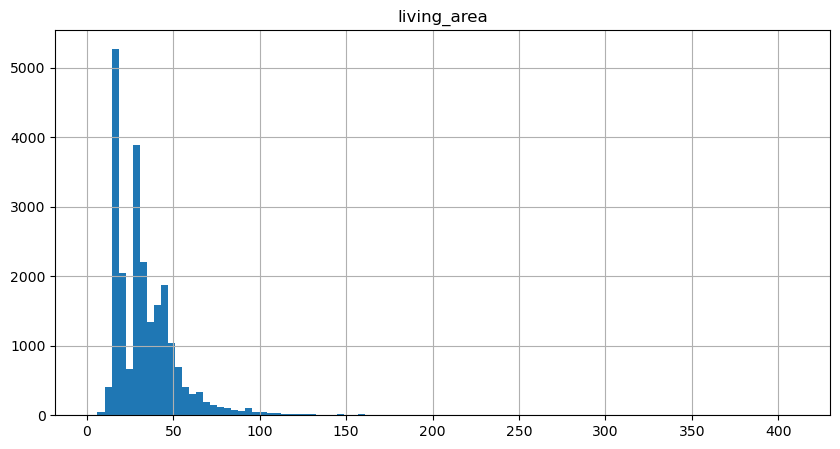

count    23345.000000
mean        34.454251
std         21.764343
min          2.000000
25%         18.500000
50%         30.500000
75%         42.800000
max        409.700000
Name: living_area, dtype: float64


In [ ]:
# Гистограмма для столбца жилой площади
data.hist('living_area', bins=100, figsize = (10,5))
plt.show()
print(data['living_area'].describe())

Из гистограммы видно, что средняя жилая площадь составляет - 34,4 м2, а квартиры с жил. площадью свыше 50 м2, являются редкостью по убыванию

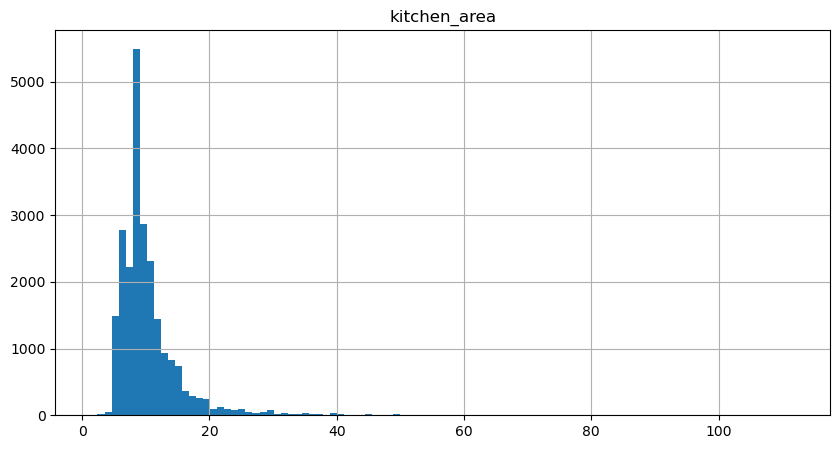

count    23345.000000
mean        10.455280
std          5.667794
min          1.300000
25%          7.300000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64


In [ ]:
# Гистограмма для столбца площади кухни
data.hist('kitchen_area', bins=100, figsize = (10,5))
plt.show()
print(data['kitchen_area'].describe())

Из гистограммы видно, что средняя площадь кухни составляет - 10,4 м2, а квартиры с площадью кухни свыше 20 м2, являются редкостью по убыванию

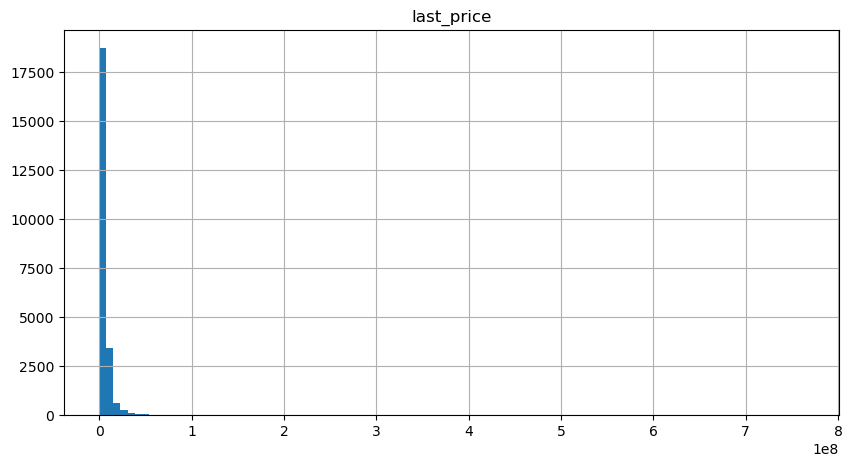

count    2.334500e+04
mean     6.568079e+06
std      1.094804e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [ ]:
# Гистограмма для столбца цена объекта
data.hist('last_price', bins=100, figsize = (10,5))
plt.show()
print(data['last_price'].describe())

Из гистограммы видно, что большинство квартир стоимостью до 15 млн. рублей, максимальная стоимость квартиры составляет 763 млн. рублей.

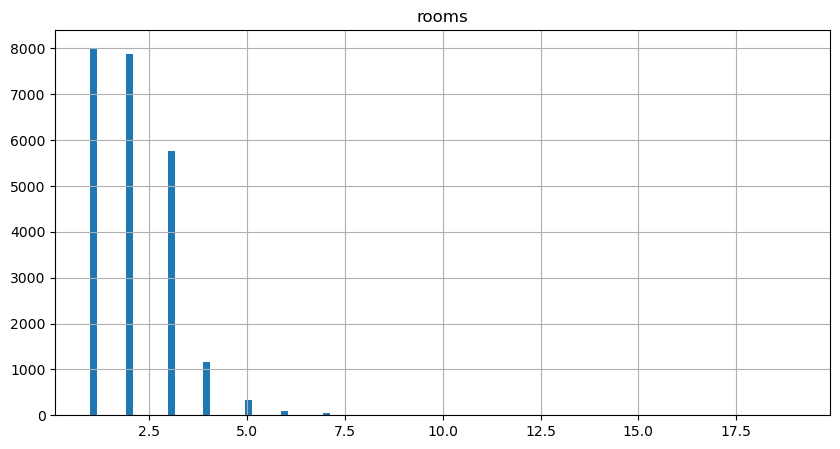

count    23345.000000
mean         2.087942
std          1.066630
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [ ]:
# Гистограмма для столбца количество комнат
data.hist('rooms', bins=100, figsize = (10,5))
plt.show()
print(data['rooms'].describe())

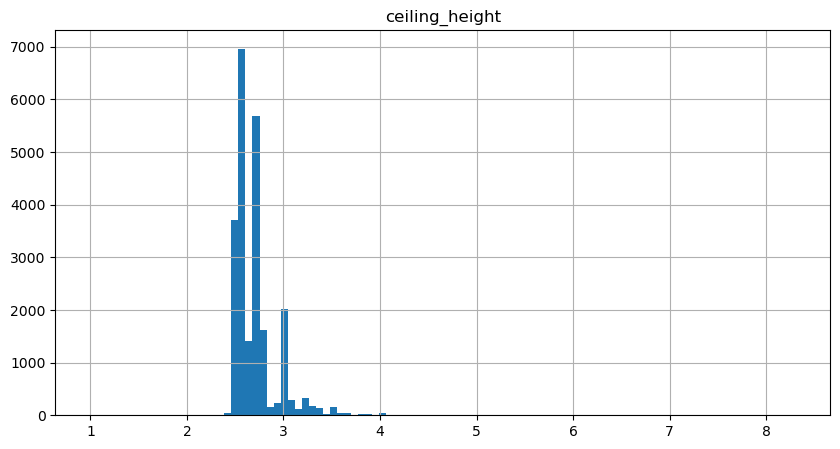

count    23345.000000
mean         2.708036
std          0.245636
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64


In [ ]:
# Гистограмма для столбца высота потолков
data.hist('ceiling_height', bins=100, figsize = (10,5))
plt.show()
print(data['ceiling_height'].describe())

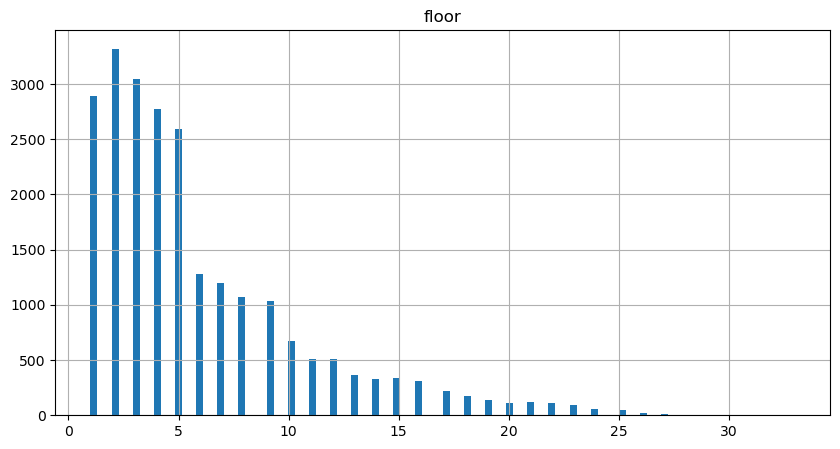

count    23345.000000
mean         5.854487
std          4.846764
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [ ]:
# Гистограмма для столбца этаж
data.hist('floor', bins=100, figsize = (10,5))
plt.show()
print(data['floor'].describe())

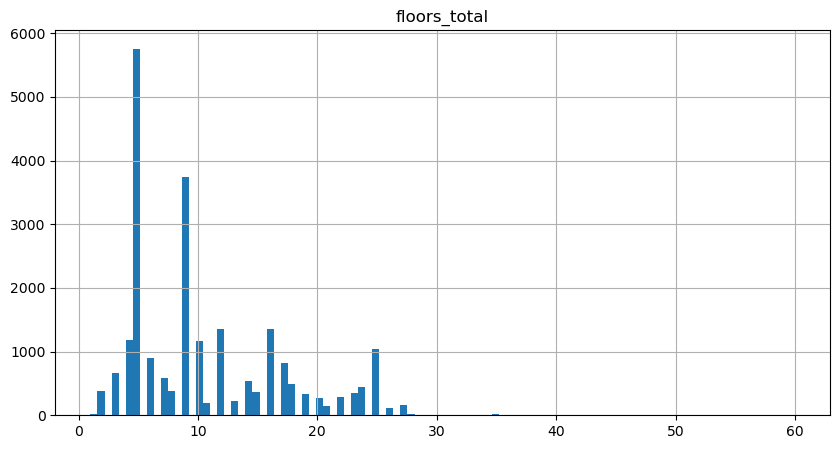

count    23345.000000
mean        10.623859
std          6.562545
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [ ]:
# Гистограмма для столбца общее число этажей в доме
data.hist('floors_total', bins=100, figsize = (10,5))
plt.show()
print(data['floors_total'].describe())

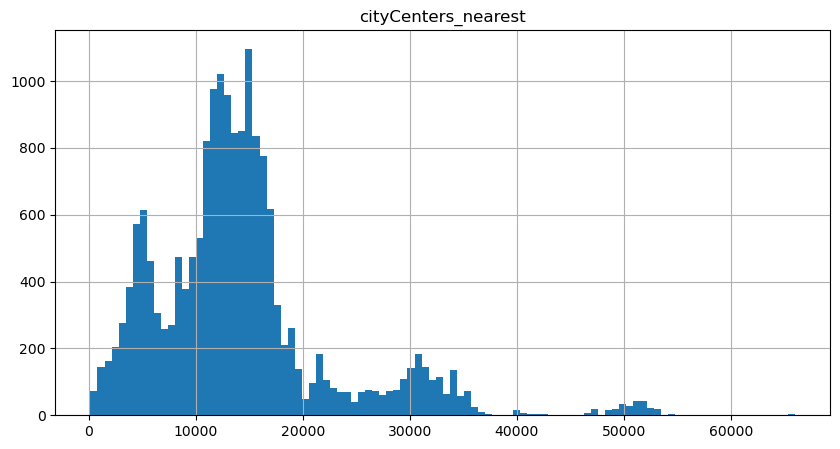

count    17929.000000
mean     14197.568353
std       8630.032759
min        181.000000
25%       9238.000000
50%      13092.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [ ]:
# Гистограмма для столбца общее расстояние до центра города
data.hist('cityCenters_nearest', bins=100, figsize = (10,5))
plt.show()
print(data['cityCenters_nearest'].describe())

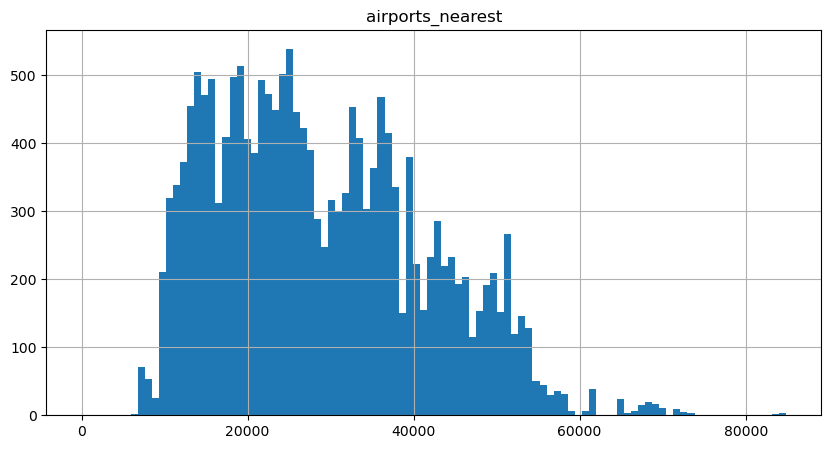

count    17906.000000
mean     28826.785658
std      12628.003648
min          0.000000
25%      18582.750000
50%      26770.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [ ]:
# Гистограмма для столбца общее расстояние до аэропорта(в метрах)
data.hist('airports_nearest', bins=100, figsize = (10,5))
plt.show()
print(data['airports_nearest'].describe())

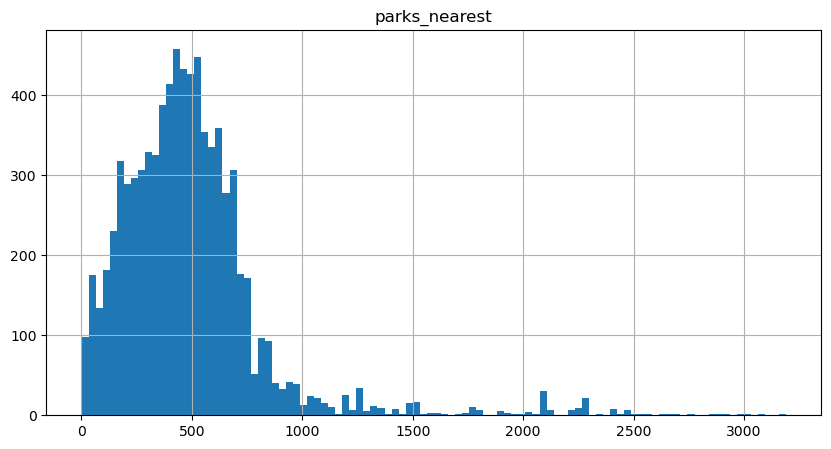

count    7994.000000
mean      490.242432
std       341.766060
min         1.000000
25%       287.250000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [ ]:
# Гистограмма для столбца общее расстояние до ближайшего парка(в метрах)
data.hist('parks_nearest', bins=100, figsize = (10,5))
plt.show()
print(data['parks_nearest'].describe())

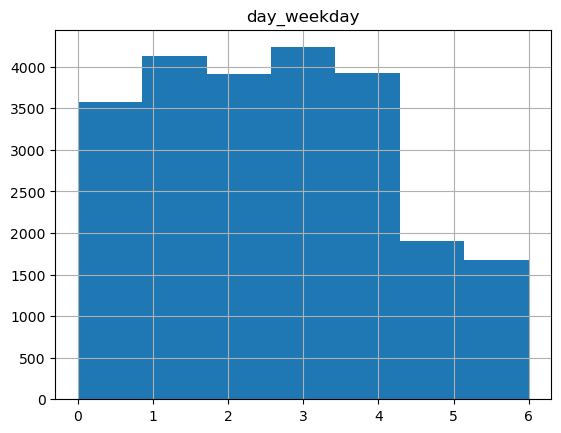

count    23345.000000
mean         2.566288
std          1.789463
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_weekday, dtype: float64


In [ ]:
data.hist('day_weekday', bins=7,)
plt.show()
print(data['day_weekday'].describe())

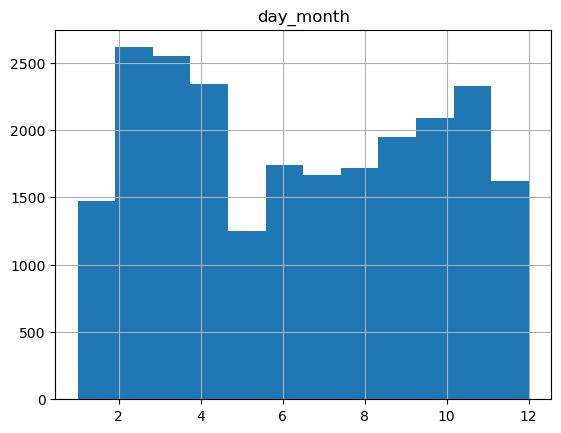

count    23345.000000
mean         6.396787
std          3.492020
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: day_month, dtype: float64


In [ ]:
data.hist('day_month', bins=12,)
plt.show()
print(data['day_month'].describe())

In [ ]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_weekday,day_month,day_year,floor_group,center_distance
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой,10.0


Из гистограммы видно, что обычно объявления размещаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" более 7-8 месяцев (медленная продажа). Среднее время продажи - 181 день, значение медианы составляет 96 дней.

Из полученных гистограмм также можно наблюдать редкие и выбивающиеся значения, например максимальная стоимость квартиры - 763 млн. рублей, максимальное время продажи квартиры - 1 580 дней (более 4 лет), также максимальная высота потолка составляет 8,3 м, максимальное количество комнат - 19.

Рассмотрим, какие факторы больше всего влияют на стоимость квартиры, построим коэффициент корреляции.

In [ ]:
print(data.corr()[['last_price', 'price_area']])

                     last_price  price_area
total_images           0.104758    0.134869
last_price             1.000000    0.739730
total_area             0.653165    0.306426
rooms                  0.364728    0.060354
ceiling_height         0.285972    0.294393
floors_total          -0.004160    0.148599
living_area            0.556303    0.215609
floor                  0.028473    0.128933
is_apartment           0.027467    0.037563
studio                -0.007491    0.000767
open_plan              0.007274    0.008625
kitchen_area           0.454231    0.369070
balcony                0.009939    0.021175
airports_nearest      -0.026942   -0.038316
cityCenters_nearest   -0.206613   -0.317692
parks_around3000       0.151098    0.186318
parks_nearest         -0.016636    0.006319
ponds_around3000       0.161474    0.192092
ponds_nearest         -0.086509   -0.106252
days_exposition        0.080378    0.048323
price_area             0.739730    1.000000
day_weekday            0.001493 

<AxesSubplot:xlabel='total_area'>

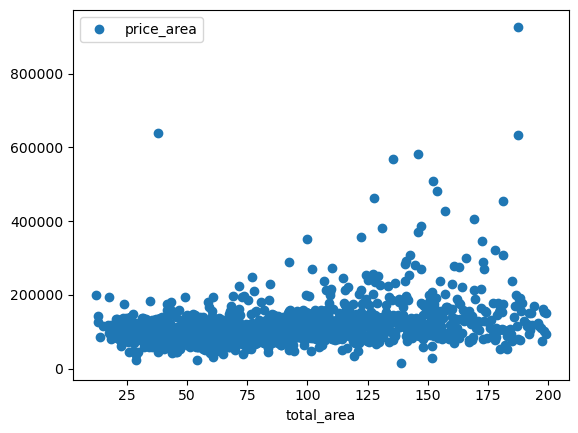

In [ ]:
#Оценим зависимость цены м2 от площади квартиры
data.query('total_area<200').pivot_table(index='total_area', values='price_area', aggfunc='median').plot(style='o')

В целом можно выделить незначительное соответствие, чем больше площадь квартиры, тем меньше цена квадратного метра и квартиры в целом.

<AxesSubplot:xlabel='kitchen_area'>

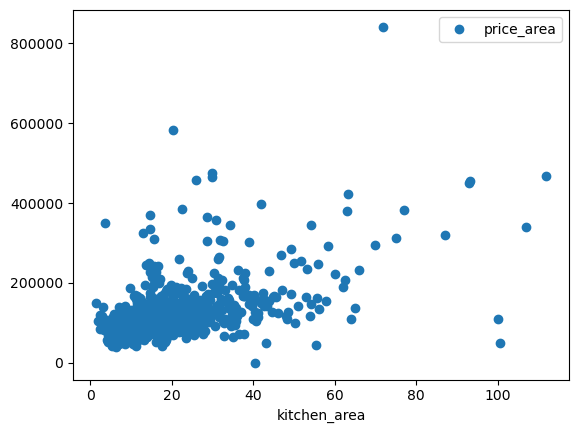

In [ ]:
#Оценим зависимость цены м2 от площади кухни
data.pivot_table(index='kitchen_area', values='price_area', aggfunc='median').plot(style='o')

<AxesSubplot:xlabel='living_area'>

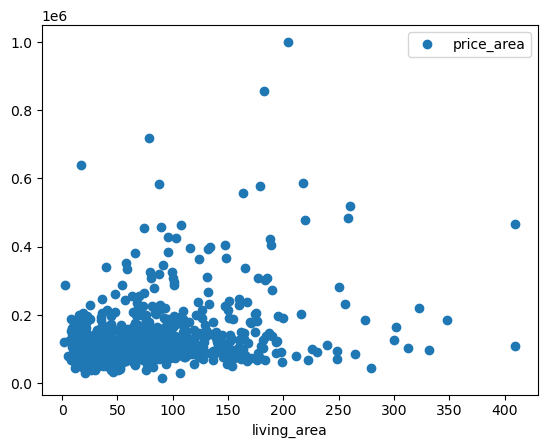

In [ ]:
#Оценим зависимость цены м2 от общей площади
data.pivot_table(index='living_area', values='price_area', aggfunc='median').plot(style='o')

In [ ]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_weekday,day_month,day_year,floor_group,center_distance
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой,10.0


<AxesSubplot:xlabel='rooms'>

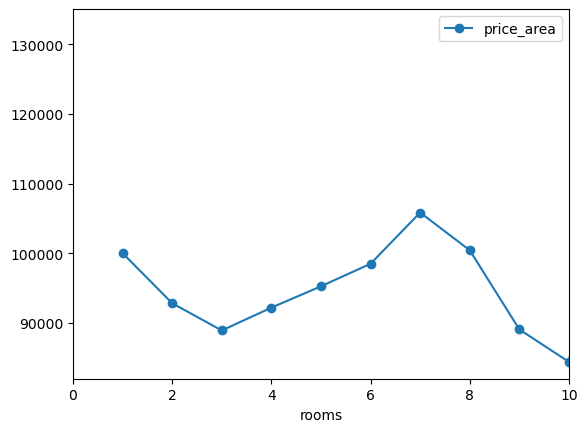

In [ ]:
# Оценим зависимость цены м2 от числа комнат
data.query('last_price<80000000').pivot_table(index='rooms', values='price_area', aggfunc='median').plot(style='o-', xlim=(0,10))

<AxesSubplot:xlabel='floor_group'>

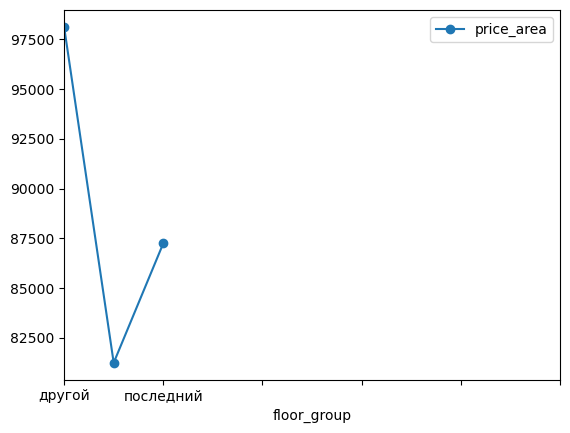

In [ ]:
# Оценим зависимость цены м2 от актегории этажа
data.query('last_price<80000000').pivot_table(index='floor_group', values='price_area', aggfunc='median').plot(style='o-', xlim=(0,10))

<AxesSubplot:xlabel='first_day_exposition'>

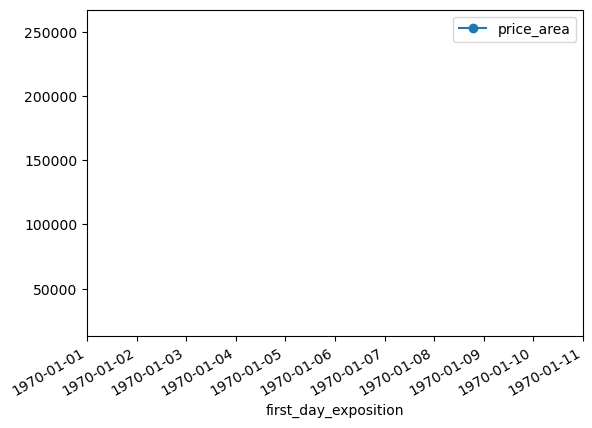

In [ ]:
# Оценим зависимость цены м2 от временных рамок
data.query('last_price<80000000').pivot_table(index='first_day_exposition', values='price_area', aggfunc='median').plot(style='o-', xlim=(0,10))

Цена за квадратный метр уменьшается при увеличении числа комнат до 3, начиная с 4 комнат, цена м2 увеличивается.

In [ ]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений
locality=data['locality_name'].value_counts().sort_values(ascending=False).head(10)
display(locality)

Санкт-Петербург      15525
поселок Мурино         525
поселок Шушары         435
Всеволожск             392
Пушкин                 369
Колпино                338
поселок Парголово      323
Гатчина                306
деревня Кудрово        283
Выборг                 237
Name: locality_name, dtype: int64

<AxesSubplot:xlabel='locality_name'>

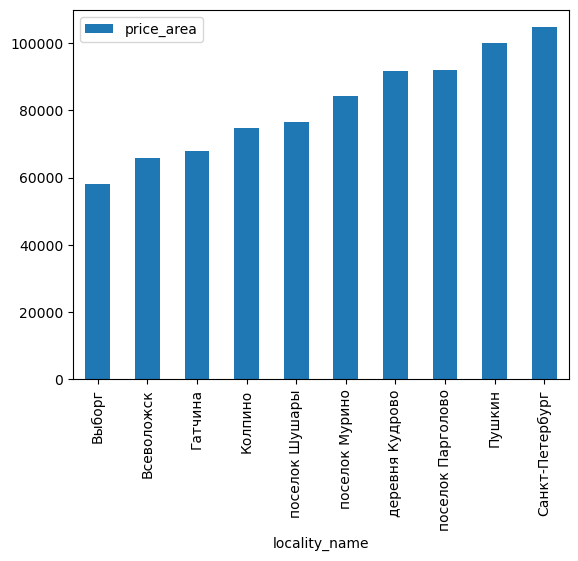

In [ ]:
# Посчитаем среднюю цену м2 в этих населённых пунктах, выделим пункты с самой высокой и низкой стоимостью жилья.
data.query('locality_name in @locality.index').pivot_table(index='locality_name', values='price_area', aggfunc='median').sort_values('price_area').plot(kind='bar')

Из графика видно, что населённые пункты с самой высокой стоимостью жилья - это Санкт-Петербург и Пушкин, с самой низкой стоимостью - Выборг и Всеволожск.

**Cредняя цена одного квадратного метра в топ-10 населенных пунктах**

<AxesSubplot:ylabel='locality_name'>

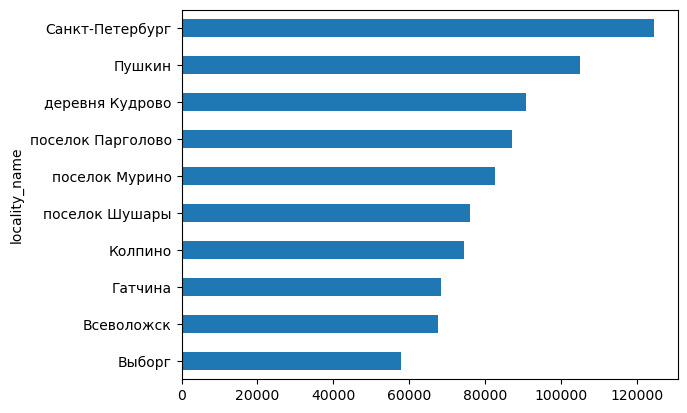

In [ ]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh')


In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_weekday,day_month,day_year,floor_group,center_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


In [ ]:
data['rooms'].value_counts()

1     7997
2     7884
3     5774
4     1171
5      325
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [ ]:
data.groupby(by='rooms')['rooms'].count().sort_values(ascending=False)

rooms
1     7997
2     7884
3     5774
4     1171
5      325
6      104
7       59
8       12
9        8
10       3
11       2
14       2
12       1
15       1
16       1
19       1
Name: rooms, dtype: int64

Ожидаемо самая дорогая недвижимость в Санкт-Петербурге.
В ТОП-10 входят ближайшие к Санкт-Петербургу города.

**Расстояние до центра города**

<AxesSubplot:xlabel='center_distance'>

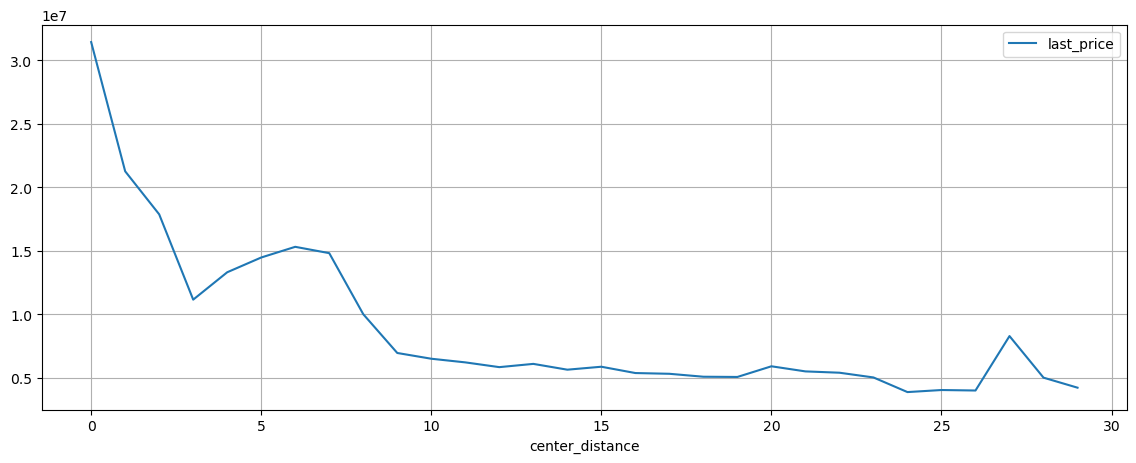

In [ ]:
spb_data = data.query ('locality_name == "Санкт-Петербург"').reset_index(drop=True)
spb_data.pivot_table(index='center_distance', values='last_price').plot(grid=True, figsize=(14, 5))

Выводы по данной категории:

Подтверждается незначительное соответствие, чем больше площадь квартиры, тем меньше цена квадратного метра и квартиры в целом. Средняя площадь квартиры - 60м2.

Цена квартир возрастает от 1 до 3 комнат, затем с увеличением кол-ва комнат от 4 - стоимость м2 снижается.
Высота потолков является одним из основных факторов цены: высота от 2.7 до 3 м сильно влияет на цену, квартиры с высотой менее 2,7м стоят значительно ниже.

Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. Средняя расстояние до центра - 13,7 км.

Стоимость м2 постепенно расте до 7-8 этажа, после стоимость м2 снижается. Квартиры на первом и последнем этаже дешевле чем на других этажах. Также на первом этаже цена существенно ниже чем на последнем.

Наибольшее значение цены м2 у объявлений, выставленных в середине недели, наименьшая - у объявлений выставленных в конце недели.

Высокие цены у квартир, выставленных в апреле, августе и декабре, наименьшая - в мае

Средняя цена растет с 2014 до 2017г

**Общий вывод**

Проведя исследовательскую работу по объявлениям о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет можно сделать следующие выводы:

1) Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. Средняя расстояние до центра - 13,7 км.
2) Высота потолков является одним из самых сильным фактором цены: высота от 2.7 до 3.0 прямо влияет на цену кв. метра. При высоте потолков ниже 2.7м цена кв. метра значительно уменьшается.
3) Первые и последние этажи во всех домах в среднем дешевле остальных этажей. Кроме того, цена квартиры на первом этаже существенно ниже чем на последнем.
При прочих равных цена квартир возрастает от 1 до 3 комнат, затем с увеличением кол-ва комнат от 4 - стоимость кв. метра снижается.
В целом можно выделить незначительное соответствие, чем больше площадь квартиры, тем меньше цена кв. метра и квартиры в целом. Средняя площадь квартиры - 60м2.
Стоимость кв. метра постепенно растет до 7-8 этажа, после чего стоимость кв. метра снижается.
Парки и водоемы поблизости незначительно увеличивают стоимость кв. метра.
Самые высокие цены на квартиры, выставленных в апреле и августе, наименьшая - у объявлений выставленных в мае и июне.
Наибольшая средняя цена квартир выставленных на продажу в начале недели (понедельник, вторниа), наименьшая - у объявлений выставленных в конце недели (суббота, воскресенье). Средняя цена кв. метра растет до 2014, снижается до 2017г, а затем постепенно увеличивается до 2019г.
Обычно объявления размещаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" более 7-8 месяцев. Среднее время продажи - 181 день.
